<a href="https://colab.research.google.com/github/Hutaf/SDA-Machine-Learning/blob/main/Seattle_weather_PCA_ML11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment ML11
###  Use PCA to reduce the number of features for the seattle weather data.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, confusion_matrix

In [2]:
filepath = 'https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv'
df = pd.read_csv(filepath)

### Explore Seattle weather data

In [3]:
print('-'*50)
print(df.info())
print('-'*50)
print(df.describe())
print('-'*50)
print(df.corr())
print('-'*50)
df.head(10)

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB
None
--------------------------------------------------
               PRCP          TMAX          TMIN
count  25548.000000  25551.000000  25551.000000
mean       0.106222     59.544206     44.514226
std        0.239031     12.772984      8.892836
min        0.000000      4.000000      0.000000
25%        0.000000     50.000000     38.000000
50%        0.000000     58.000000     45.000000
75%        0.100000     69.000000     52.000000
max        5.020000    103.000000     71.000000
------------------------------

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


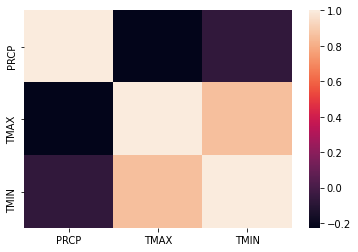

In [4]:
sns.heatmap(df.corr())

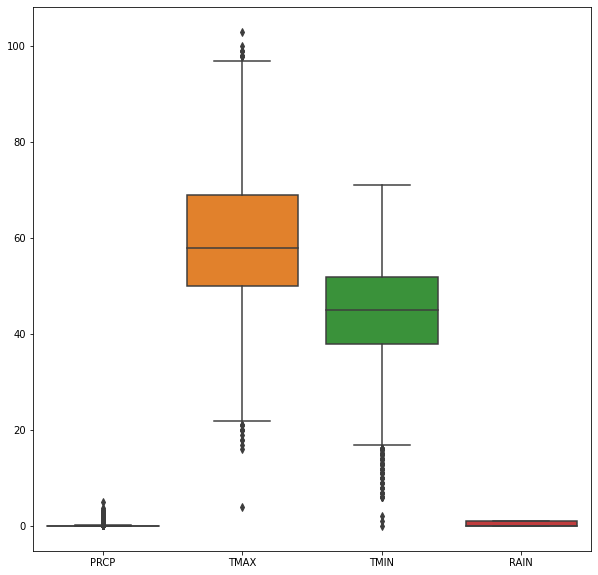

In [5]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

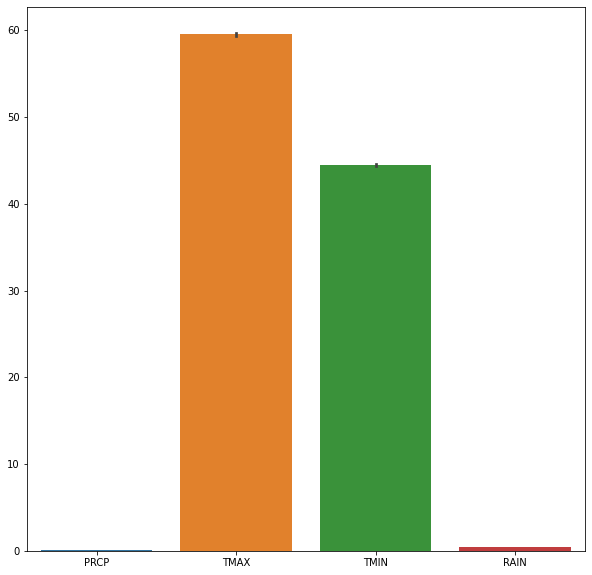

In [6]:
plt.figure(figsize=(10,10))
sns.barplot(data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


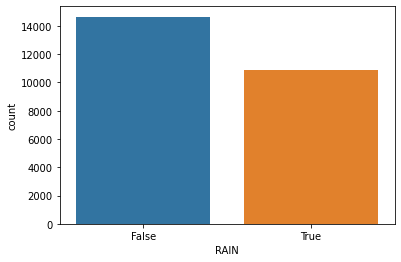

In [7]:
sns.countplot(df['RAIN'])

### Preparing the Seattle weather data

In [8]:
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [9]:
def isNull(df, column):
  return df[pd.isnull(df[column])]

In [10]:
isNull(df, 'PRCP')

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [11]:
#df['PRCP'] = df['PRCP'].fillna(df['PRCP'].median)
#isNull(df, 'PRCP')

In [12]:
#df['RAIN'] = df['RAIN'].fillna(False)
#isNull(df, 'RAIN')

In [13]:
df_no_missing = df.dropna()

In [14]:
df_no_missing.isna().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

# Modeling

In [15]:
X = df_no_missing.drop(columns=['RAIN','DATE'])
y = df_no_missing['RAIN'].astype(int)

# 1. PCA

---
##  PCA(n_components = 1)


In [16]:
pca = PCA(n_components=1)
projected_1 = pca.fit_transform(X)

In [17]:
print(X.shape)
print(projected_1.shape)

(25548, 3)
(25548, 1)


In [30]:
pca.explained_variance_ratio_

array([0.93909978, 0.06069217])

---
## PCA(n_components = 2)


In [32]:
pca = PCA(n_components=2)
projected_2 = pca.fit_transform(X)

In [33]:
print(X.shape)
print(projected_2.shape)

(25548, 3)
(25548, 2)


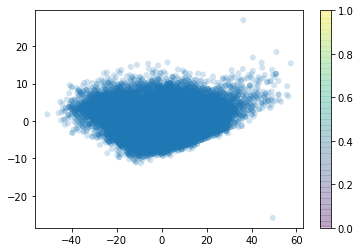

In [34]:
plt.scatter(projected_2[:, 0], projected_2[:, 1], 
            edgecolor='none', alpha=0.2)
plt.colorbar();

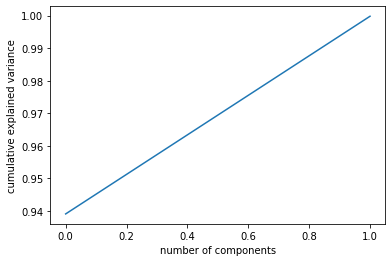

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show();

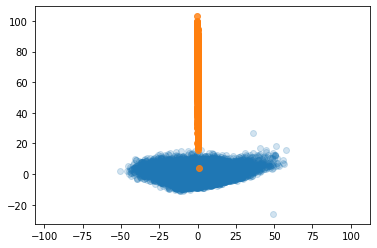

In [38]:
Projected_new = pca.inverse_transform(projected_2)
plt.scatter(projected_2[:, 0], projected_2[:, 1], alpha=0.2)
plt.scatter(Projected_new[:, 0], Projected_new[:, 1], alpha=0.8)
plt.axis('equal');

## PCA(n_components = 3)

In [39]:
pca = PCA(n_components=3)
projected_3 = pca.fit_transform(X)

In [40]:
print(X.shape)
print(projected_3.shape)

(25548, 3)
(25548, 3)


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


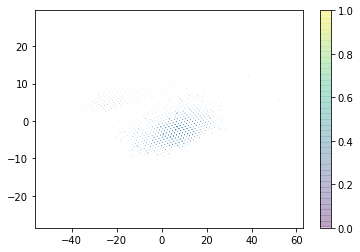

In [41]:
plt.scatter(projected_3[:, 0], projected_3[:, 1], projected_3[:, 2],
            edgecolor='none', alpha=0.2)
plt.colorbar();

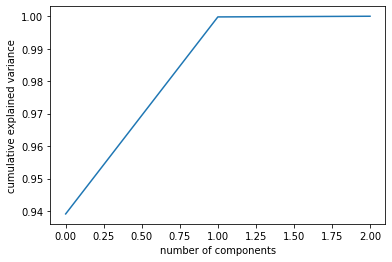

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show();

In [43]:
projected_3

array([[ 8.51823056, -2.60533151,  0.29197949],
       [16.82952914, -0.89637602,  0.41920798],
       [17.3790387 , -0.05822917,  0.2628459 ],
       ...,
       [18.19266477,  3.00444015, -0.10385461],
       [15.4223468 ,  2.43406087, -0.10627089],
       [12.65202884,  1.86368159, -0.10868717]])

## 2. Split Data

In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(projected_1, y, test_size=0.2, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(projected_2, y, test_size=0.2, random_state = 42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(projected_3, y, test_size=0.2, random_state = 42)

---
## 3. Training & Evaluation

In [45]:
def evaluation(model, X_test, y_test):
  print("Accuracy: {}%".format(round(accuracy_score(y_test, model.predict(X_test))*100)))
  print("Precision: {}%".format(round(precision_score(y_test, model.predict(X_test))*100)))
  print("Recall: {}%".format(round(recall_score(y_test, model.predict(X_test))*100)))
  print("MSE: {}".format(mean_squared_error(y_test, model.predict(X_test))))

In [46]:
reg= LogisticRegression(random_state=42,solver = 'lbfgs')
reg.fit(X_train1,y_train1)
print("Training Accuracy n_component = 1: {}%".format(round(accuracy_score(y_train1, reg.predict(X_train1))*100)))

Training Accuracy n_component = 1: 63.0%


In [47]:
print('*'*30)
print("Testing Performance (n_component = 1)")
print('*'*30)
evaluation(reg, X_test1, y_test1)

******************************
Testing Performance (n_component = 1)
******************************
Accuracy: 62.0%
Precision: 56.0%
Recall: 48.0%
MSE: 0.38140900195694716


In [48]:
reg= LogisticRegression(random_state=42,solver = 'lbfgs')
reg.fit(X_train2,y_train2)
print("Training Accuracy n_component = 2: {}%".format(round(accuracy_score(y_train2, reg.predict(X_train2))*100)))

Training Accuracy n_component = 2: 75.0%


In [49]:
print('*'*30)
print("Testing Performance (n_component = 2)")
print('*'*30)
evaluation(reg, X_test2, y_test2)

******************************
Testing Performance (n_component = 2)
******************************
Accuracy: 74.0%
Precision: 69.0%
Recall: 71.0%
MSE: 0.2604696673189824


In [50]:
reg= LogisticRegression(random_state=42,solver = 'lbfgs')
reg.fit(X_train3,y_train3)
print("Training Accuracy n_component = 3: {}%".format(round(accuracy_score(y_train3, reg.predict(X_train3))*100)))

Training Accuracy n_component = 3: 93.0%


In [51]:
print('*'*30)
print("Testing Performance (n_component = 3)")
print('*'*30)
evaluation(reg, X_test3, y_test3)

******************************
Testing Performance (n_component = 3)
******************************
Accuracy: 93.0%
Precision: 100.0%
Recall: 84.0%
MSE: 0.07025440313111546


### Extra: Confusion Matrix

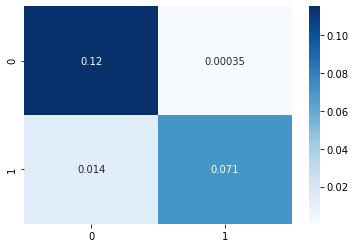

In [52]:
sns.heatmap(confusion_matrix(y_test3, reg.predict(X_test3)) / len(y), cmap='Blues', annot=True)

# **Extras**

Best parameter (CV score=1.000):
{'logistic__C': 10000.0, 'pca__n_components': 3}


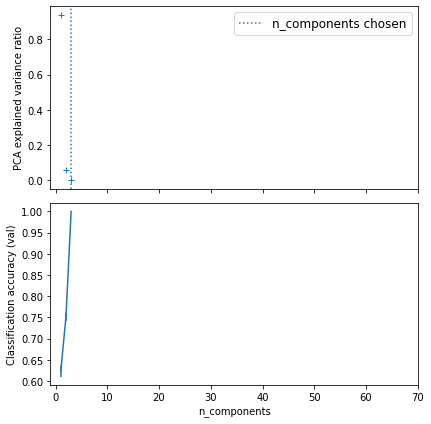

In [54]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X = df_no_missing.drop(columns=['RAIN','DATE'])
y = df_no_missing['RAIN'].astype(int)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [1, 2, 3],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X, y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()